In [1]:
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

warnings.filterwarnings('ignore')
sns.set_style("darkgrid")



import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")



In [2]:
# Daten laden
data = pd.read_excel('DryBeanDataset/Dry_Bean_Dataset.xlsx')
# Datenverteilung überprüfen
print(data['Class'].value_counts())



Numeric_cols = data.drop(columns=['Class']).columns

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64


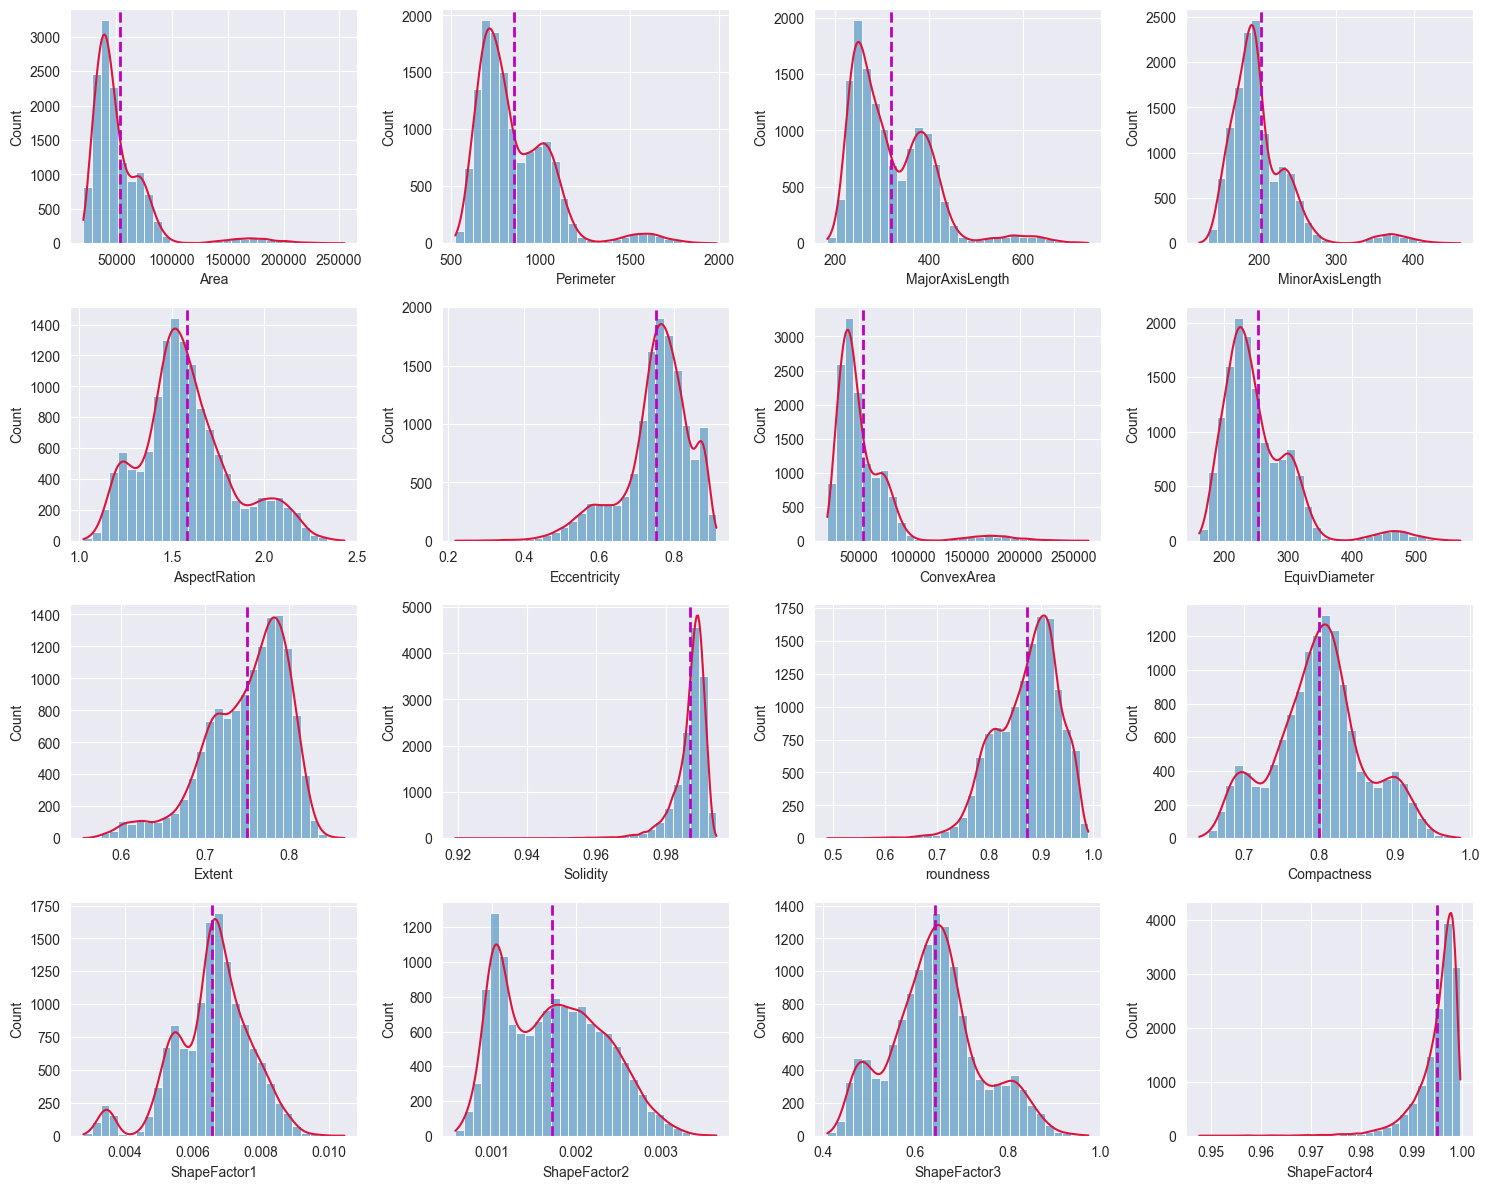

In [3]:
fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g = sns.histplot(data[variable], bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=data[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

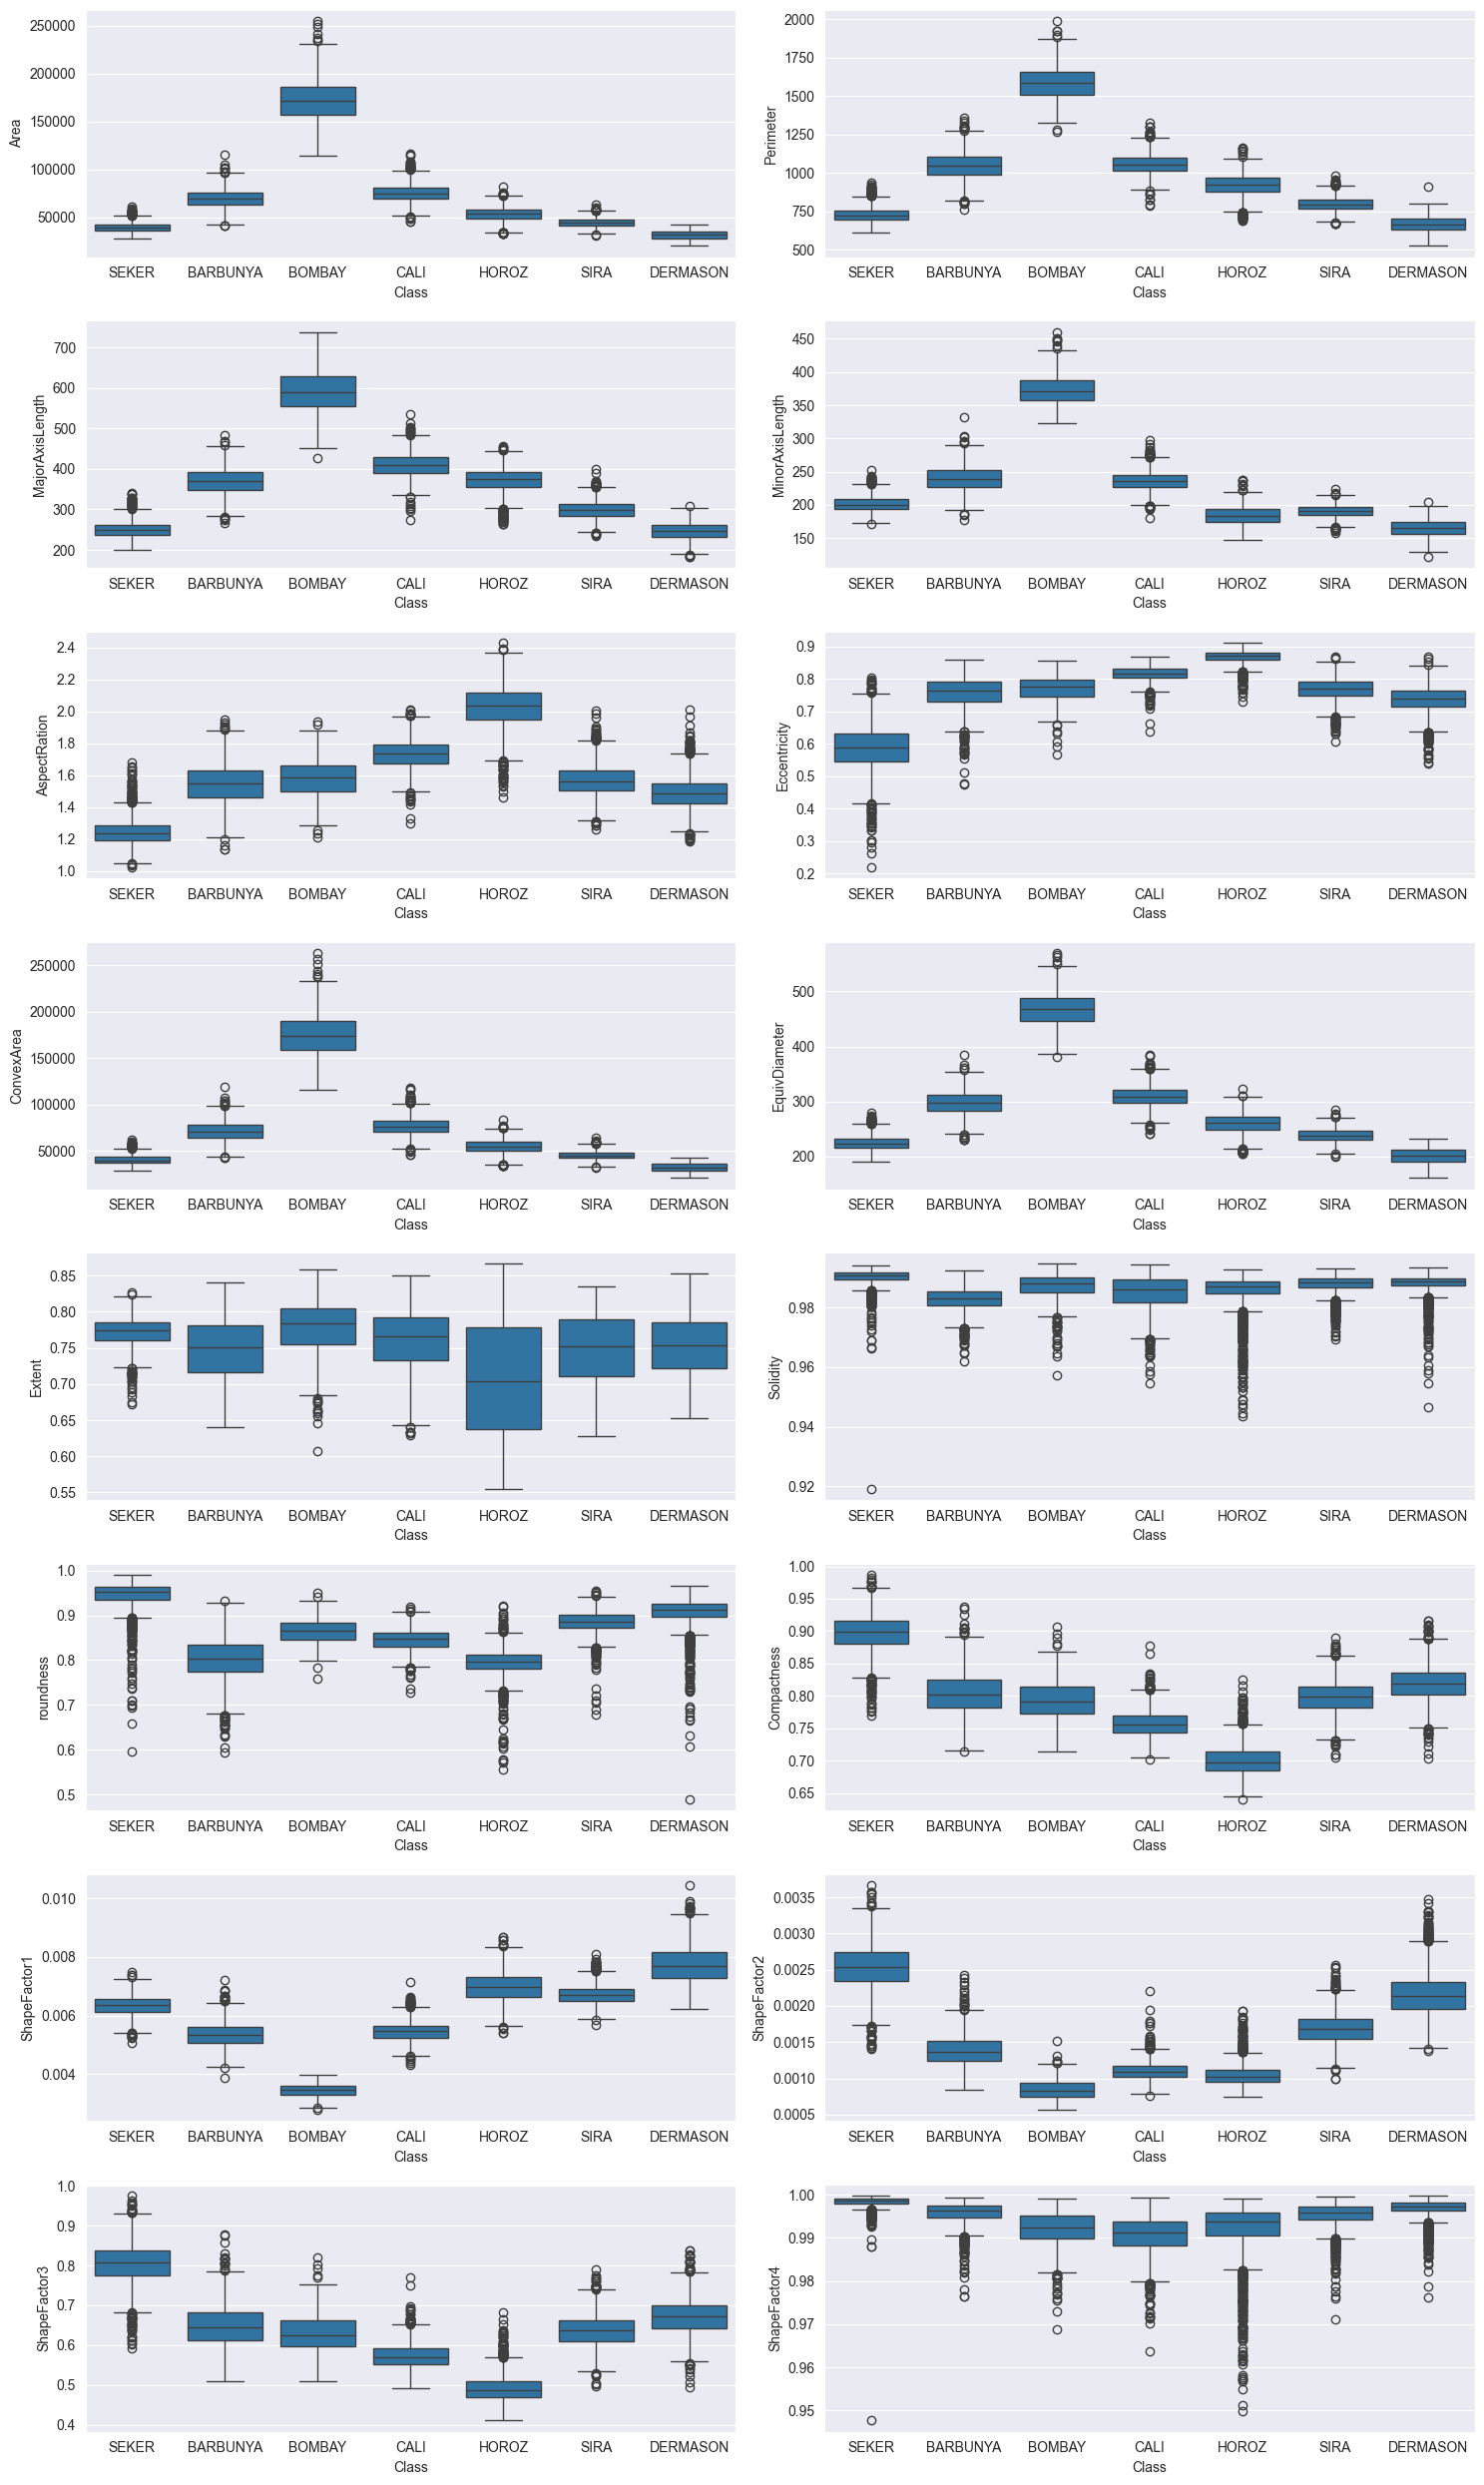

In [4]:
# Boxplots der numerischen Merkmale nach Klasse
fig, ax = plt.subplots(8, 2, figsize=(15, 25))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(x=data['Class'], y=data[variable], ax=subplot)
plt.tight_layout()

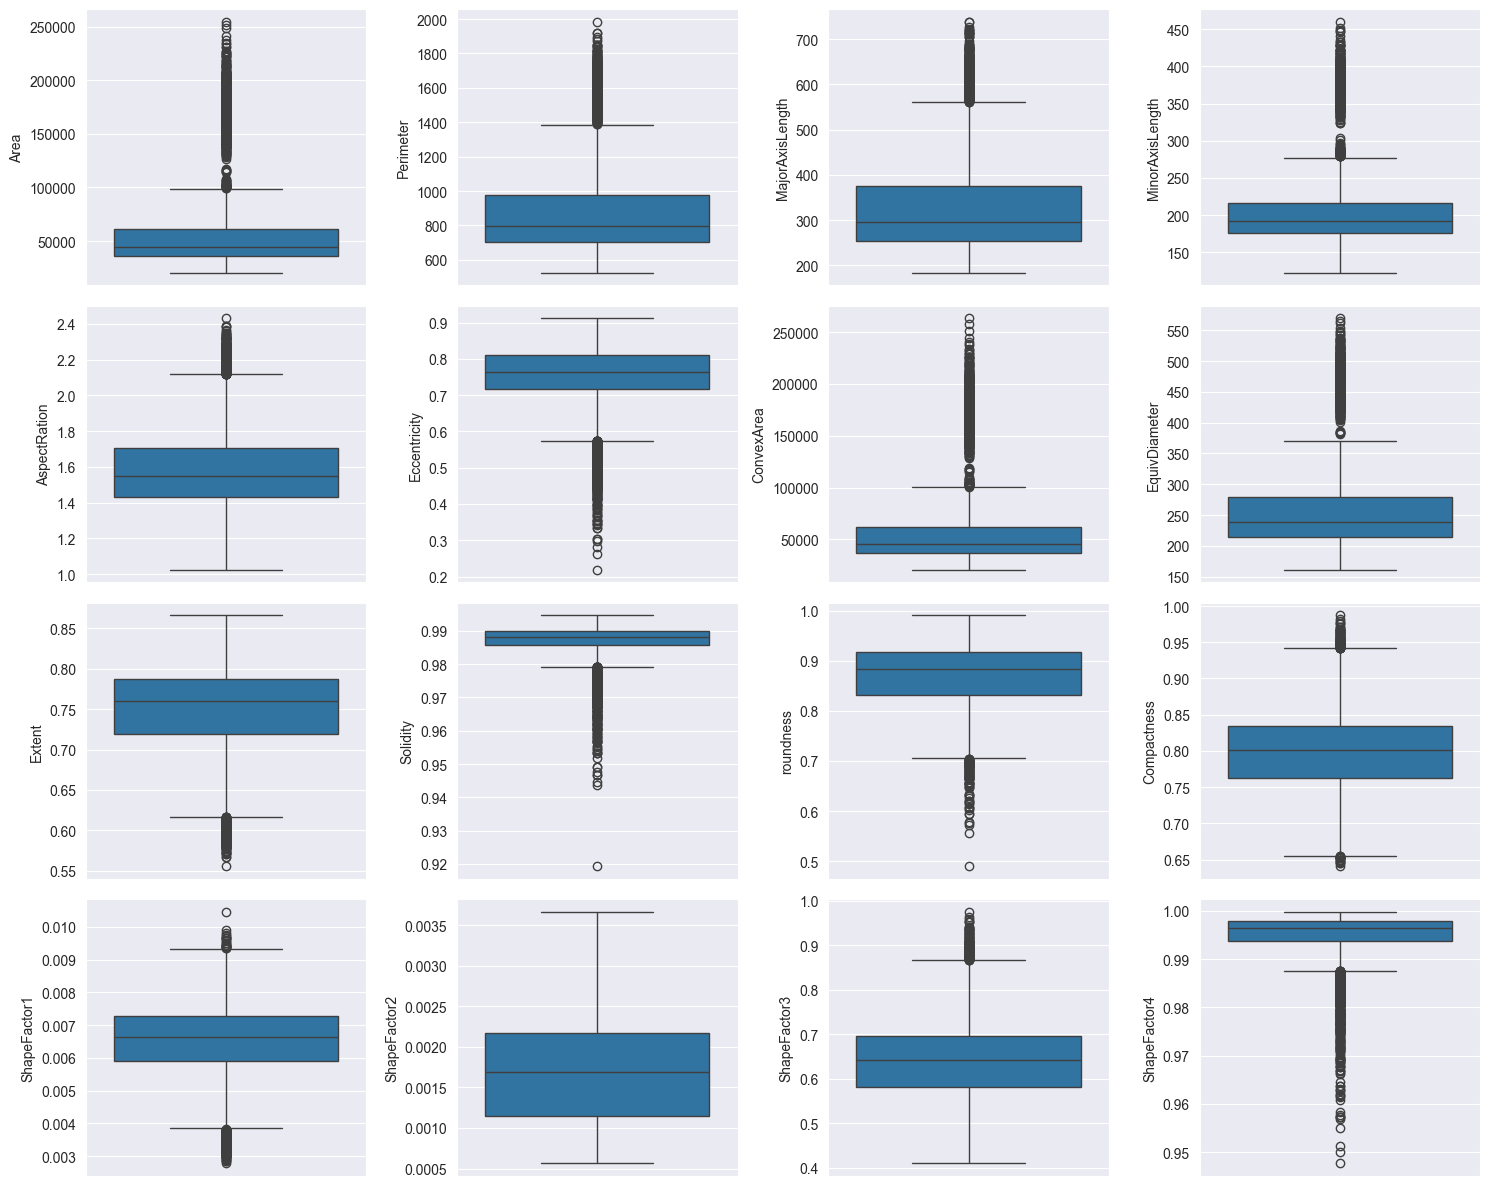

In [5]:
# Boxplots der numerischen Merkmale
fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(y=data[variable], ax=subplot)
plt.tight_layout()

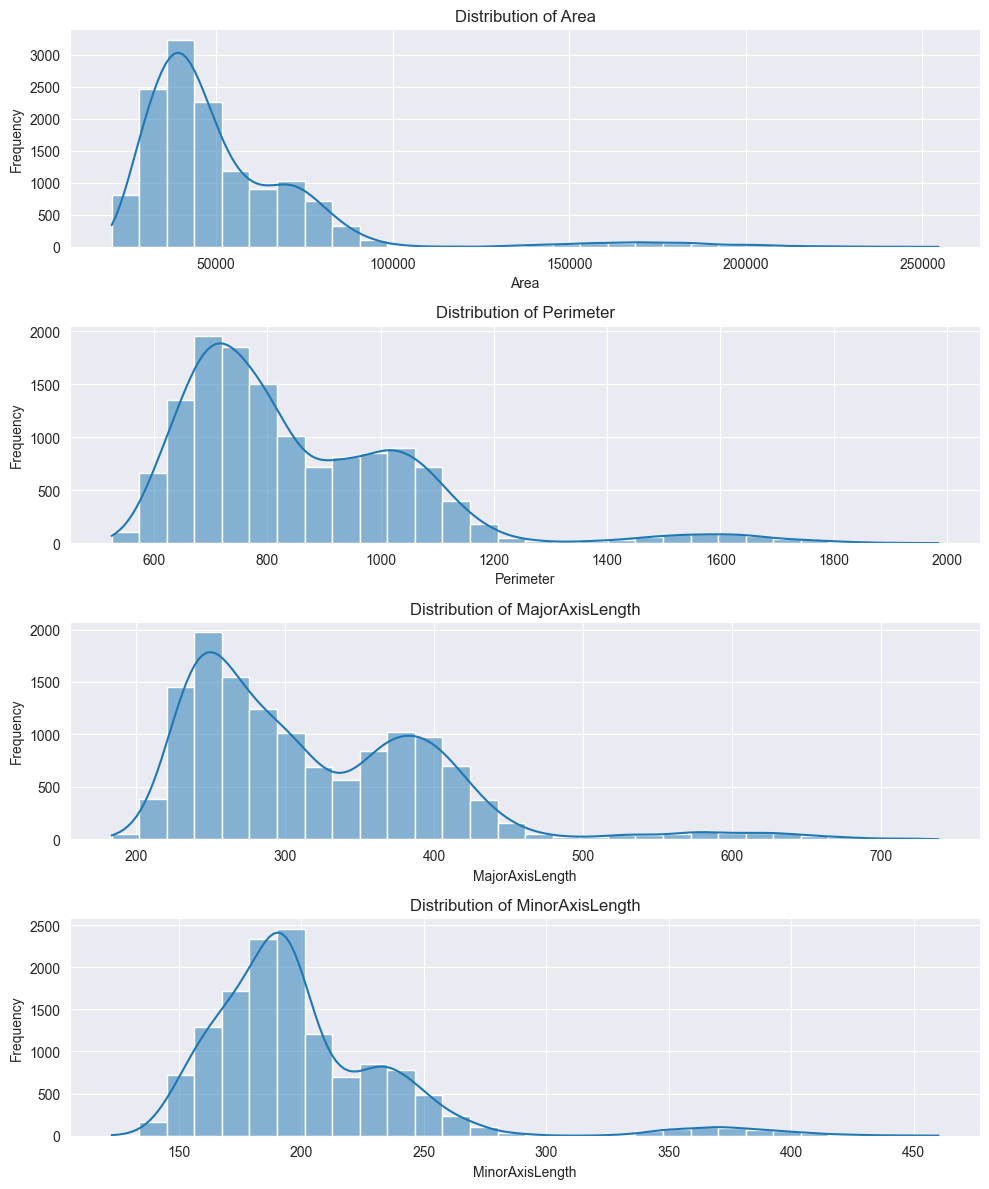

In [8]:
parameters_to_compare = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength']

# Erstellen eines Histogramms für die ausgewählten Parameter
fig, ax = plt.subplots(len(parameters_to_compare), 1, figsize=(10, 12))

for i, parameter in enumerate(parameters_to_compare):
    sns.histplot(data[parameter], bins=30, kde=True, ax=ax[i])
    ax[i].set_title(f'Distribution of {parameter}')
    ax[i].set_xlabel(parameter)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

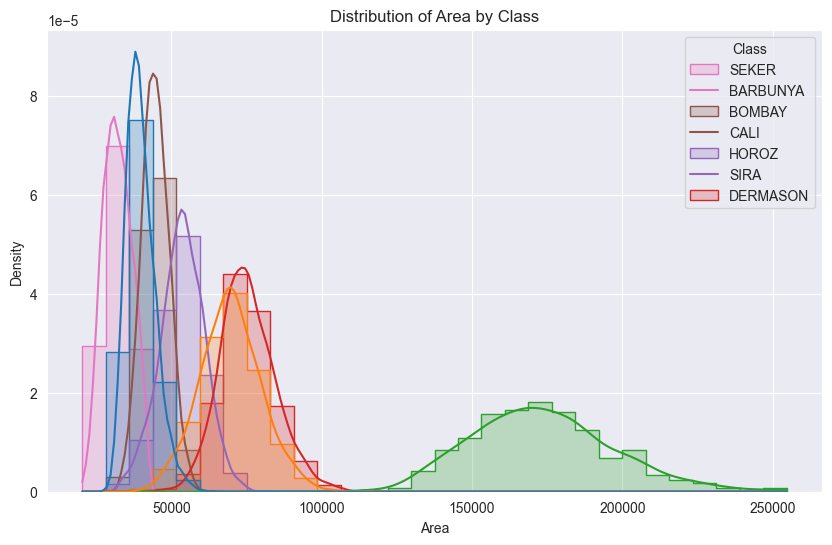

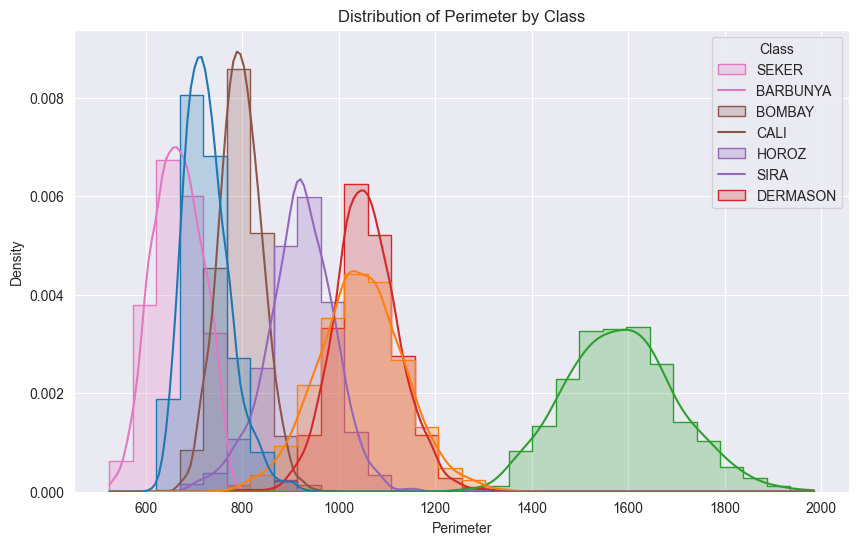

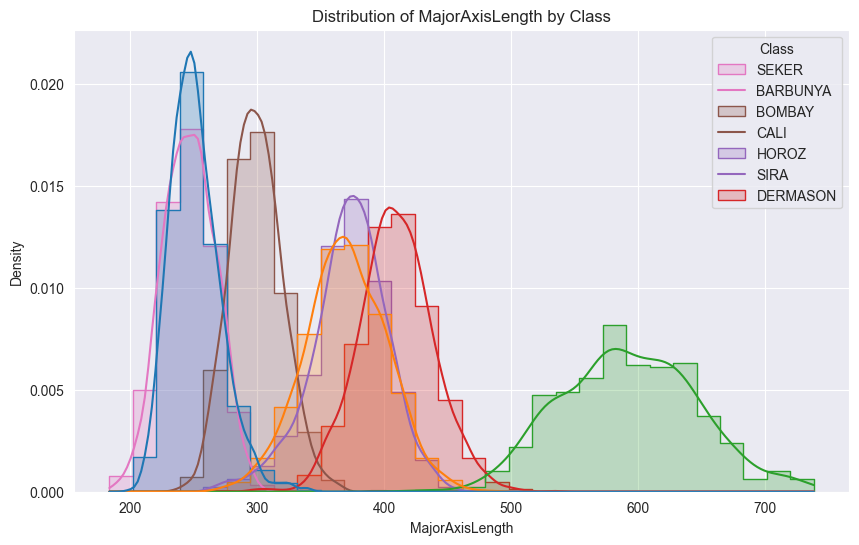

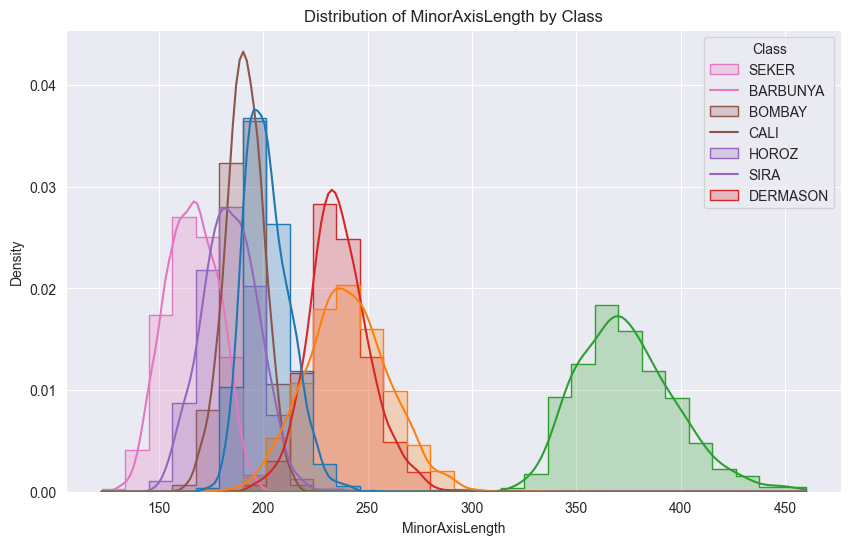

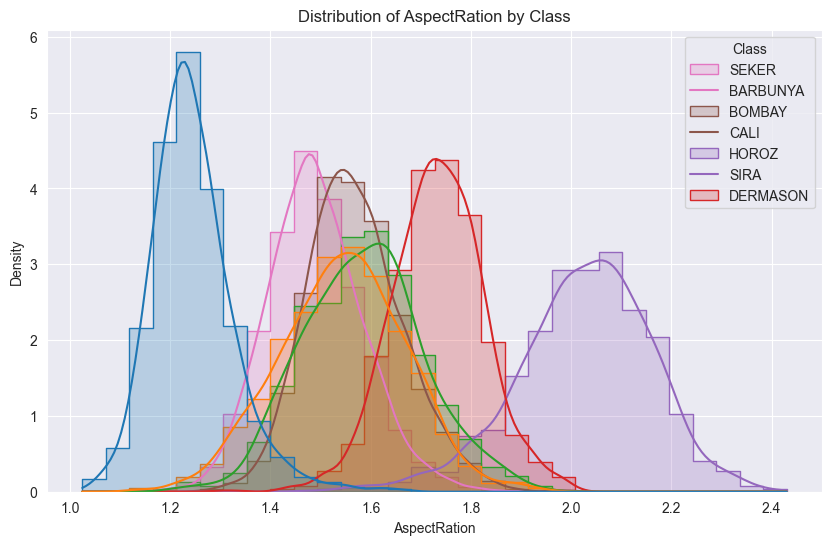

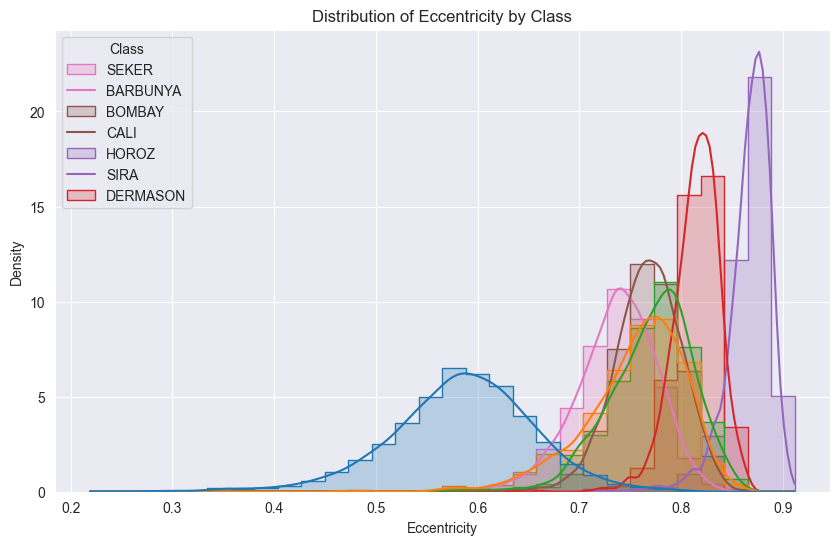

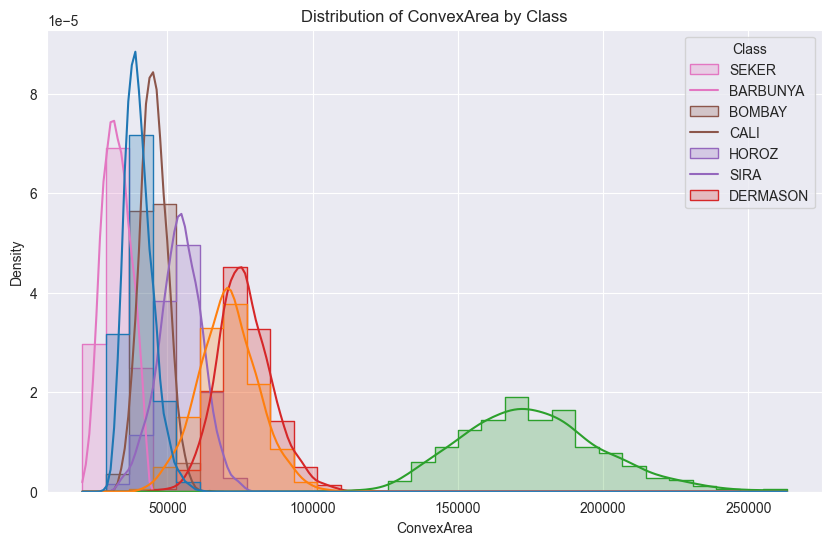

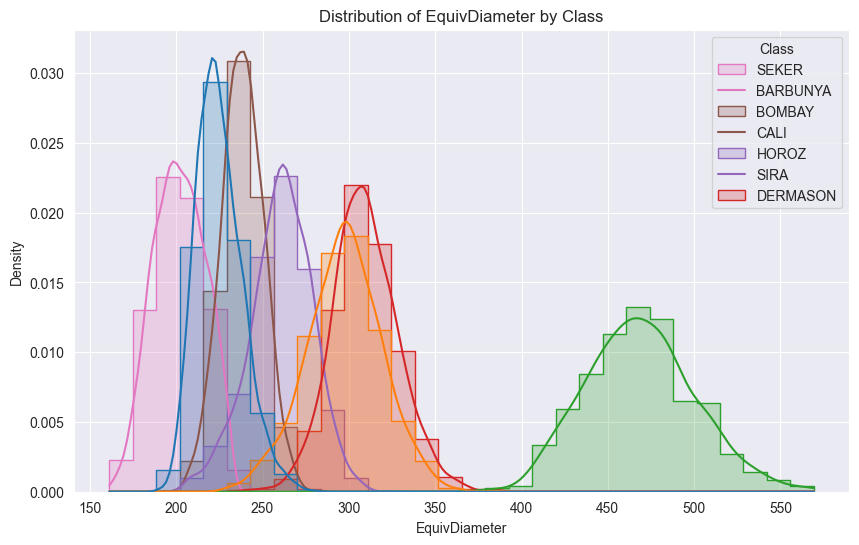

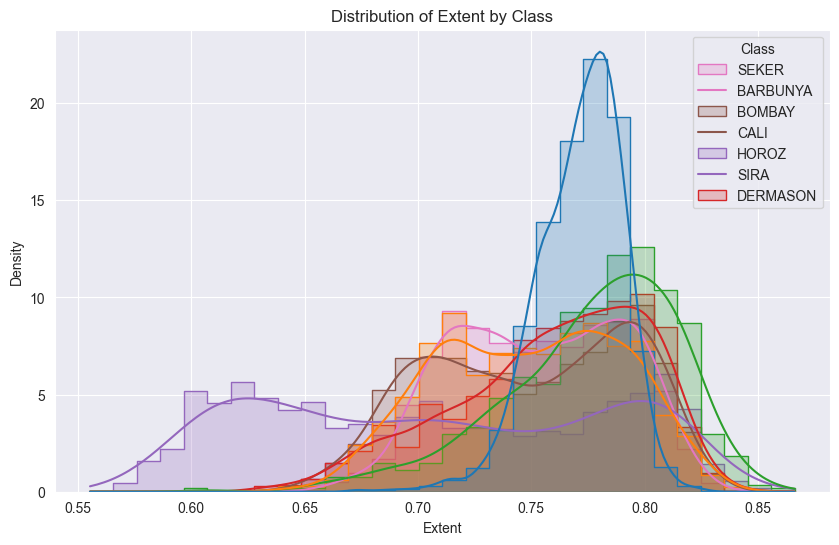

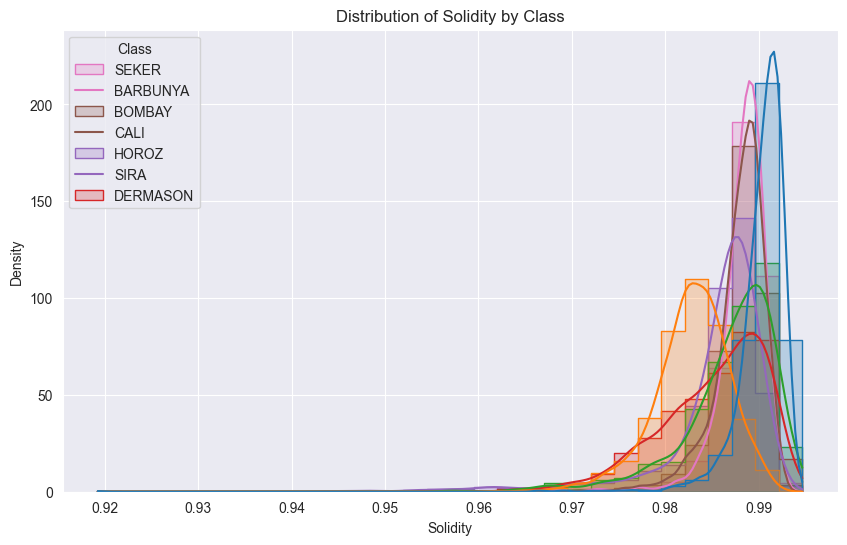

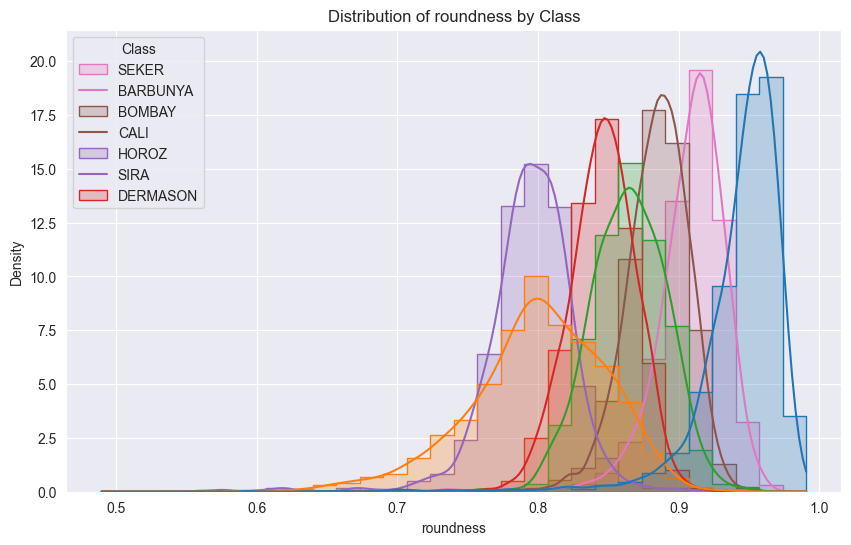

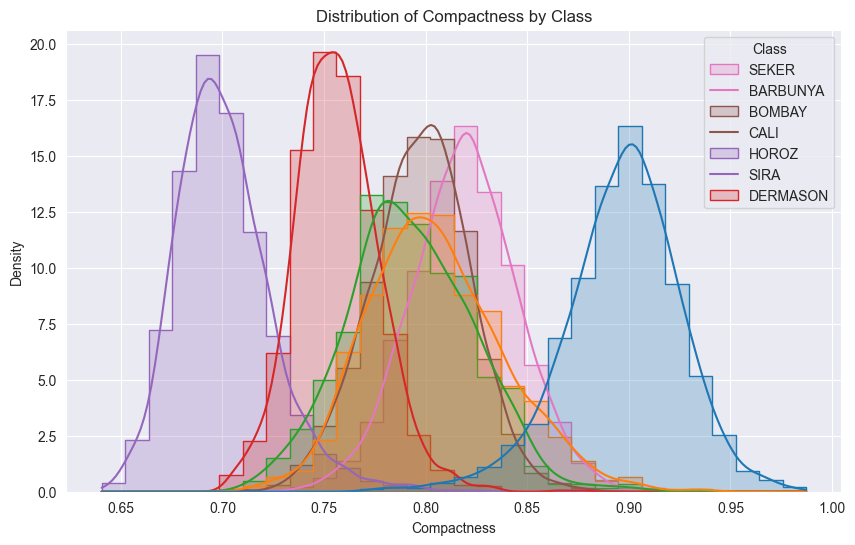

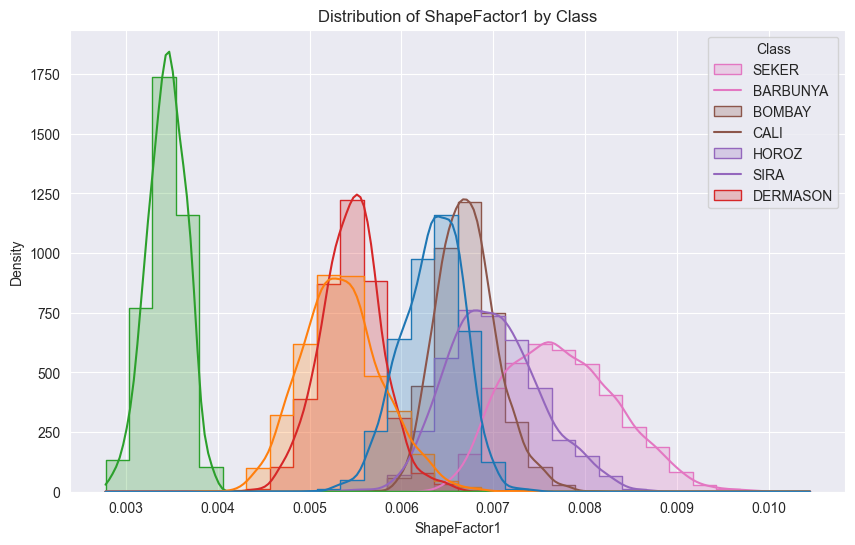

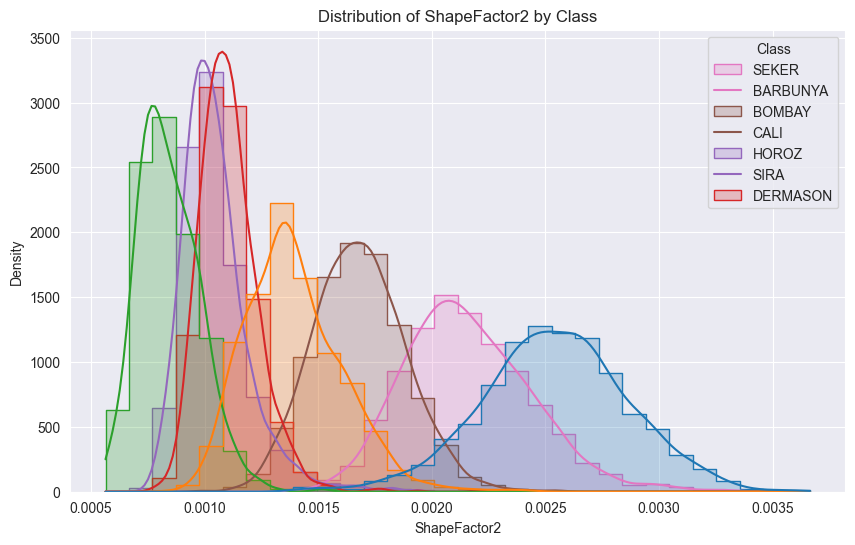

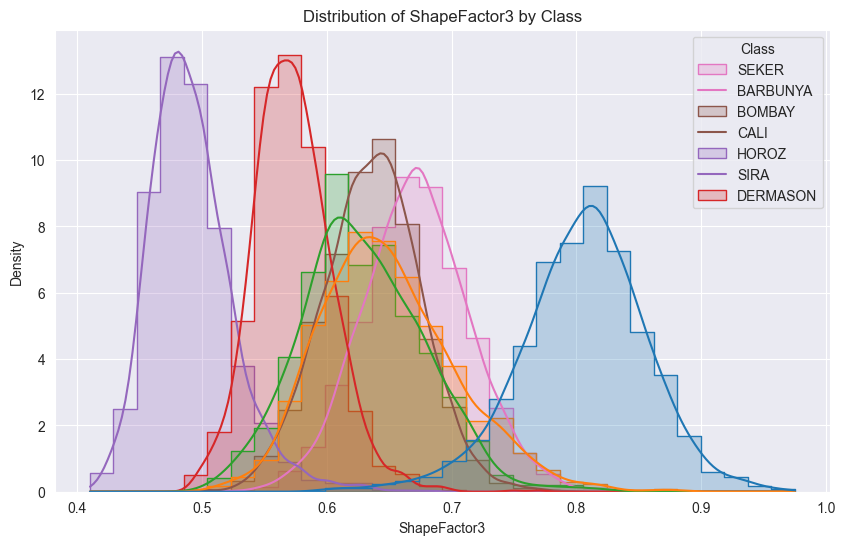

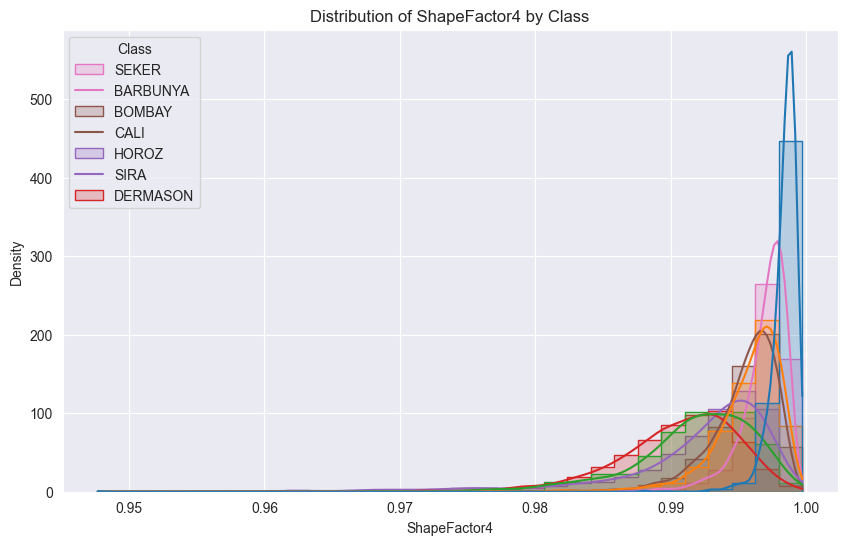

In [9]:

# Alle numerischen Parameter identifizieren
numeric_cols = data.drop(columns=['Class']).columns

# Erstellen eines Histogramms für jeden Parameter, gruppiert nach Klasse
for parameter in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data, x=parameter, hue='Class', bins=30, kde=True, element="step", stat="density", common_norm=False)
    plt.title(f'Distribution of {parameter} by Class')
    plt.xlabel(parameter)
    plt.ylabel('Density')
    plt.legend(title='Class', labels=data['Class'].unique())
    plt.show()

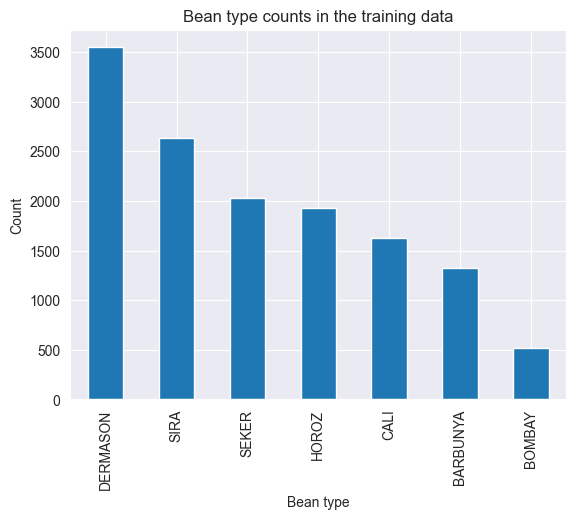

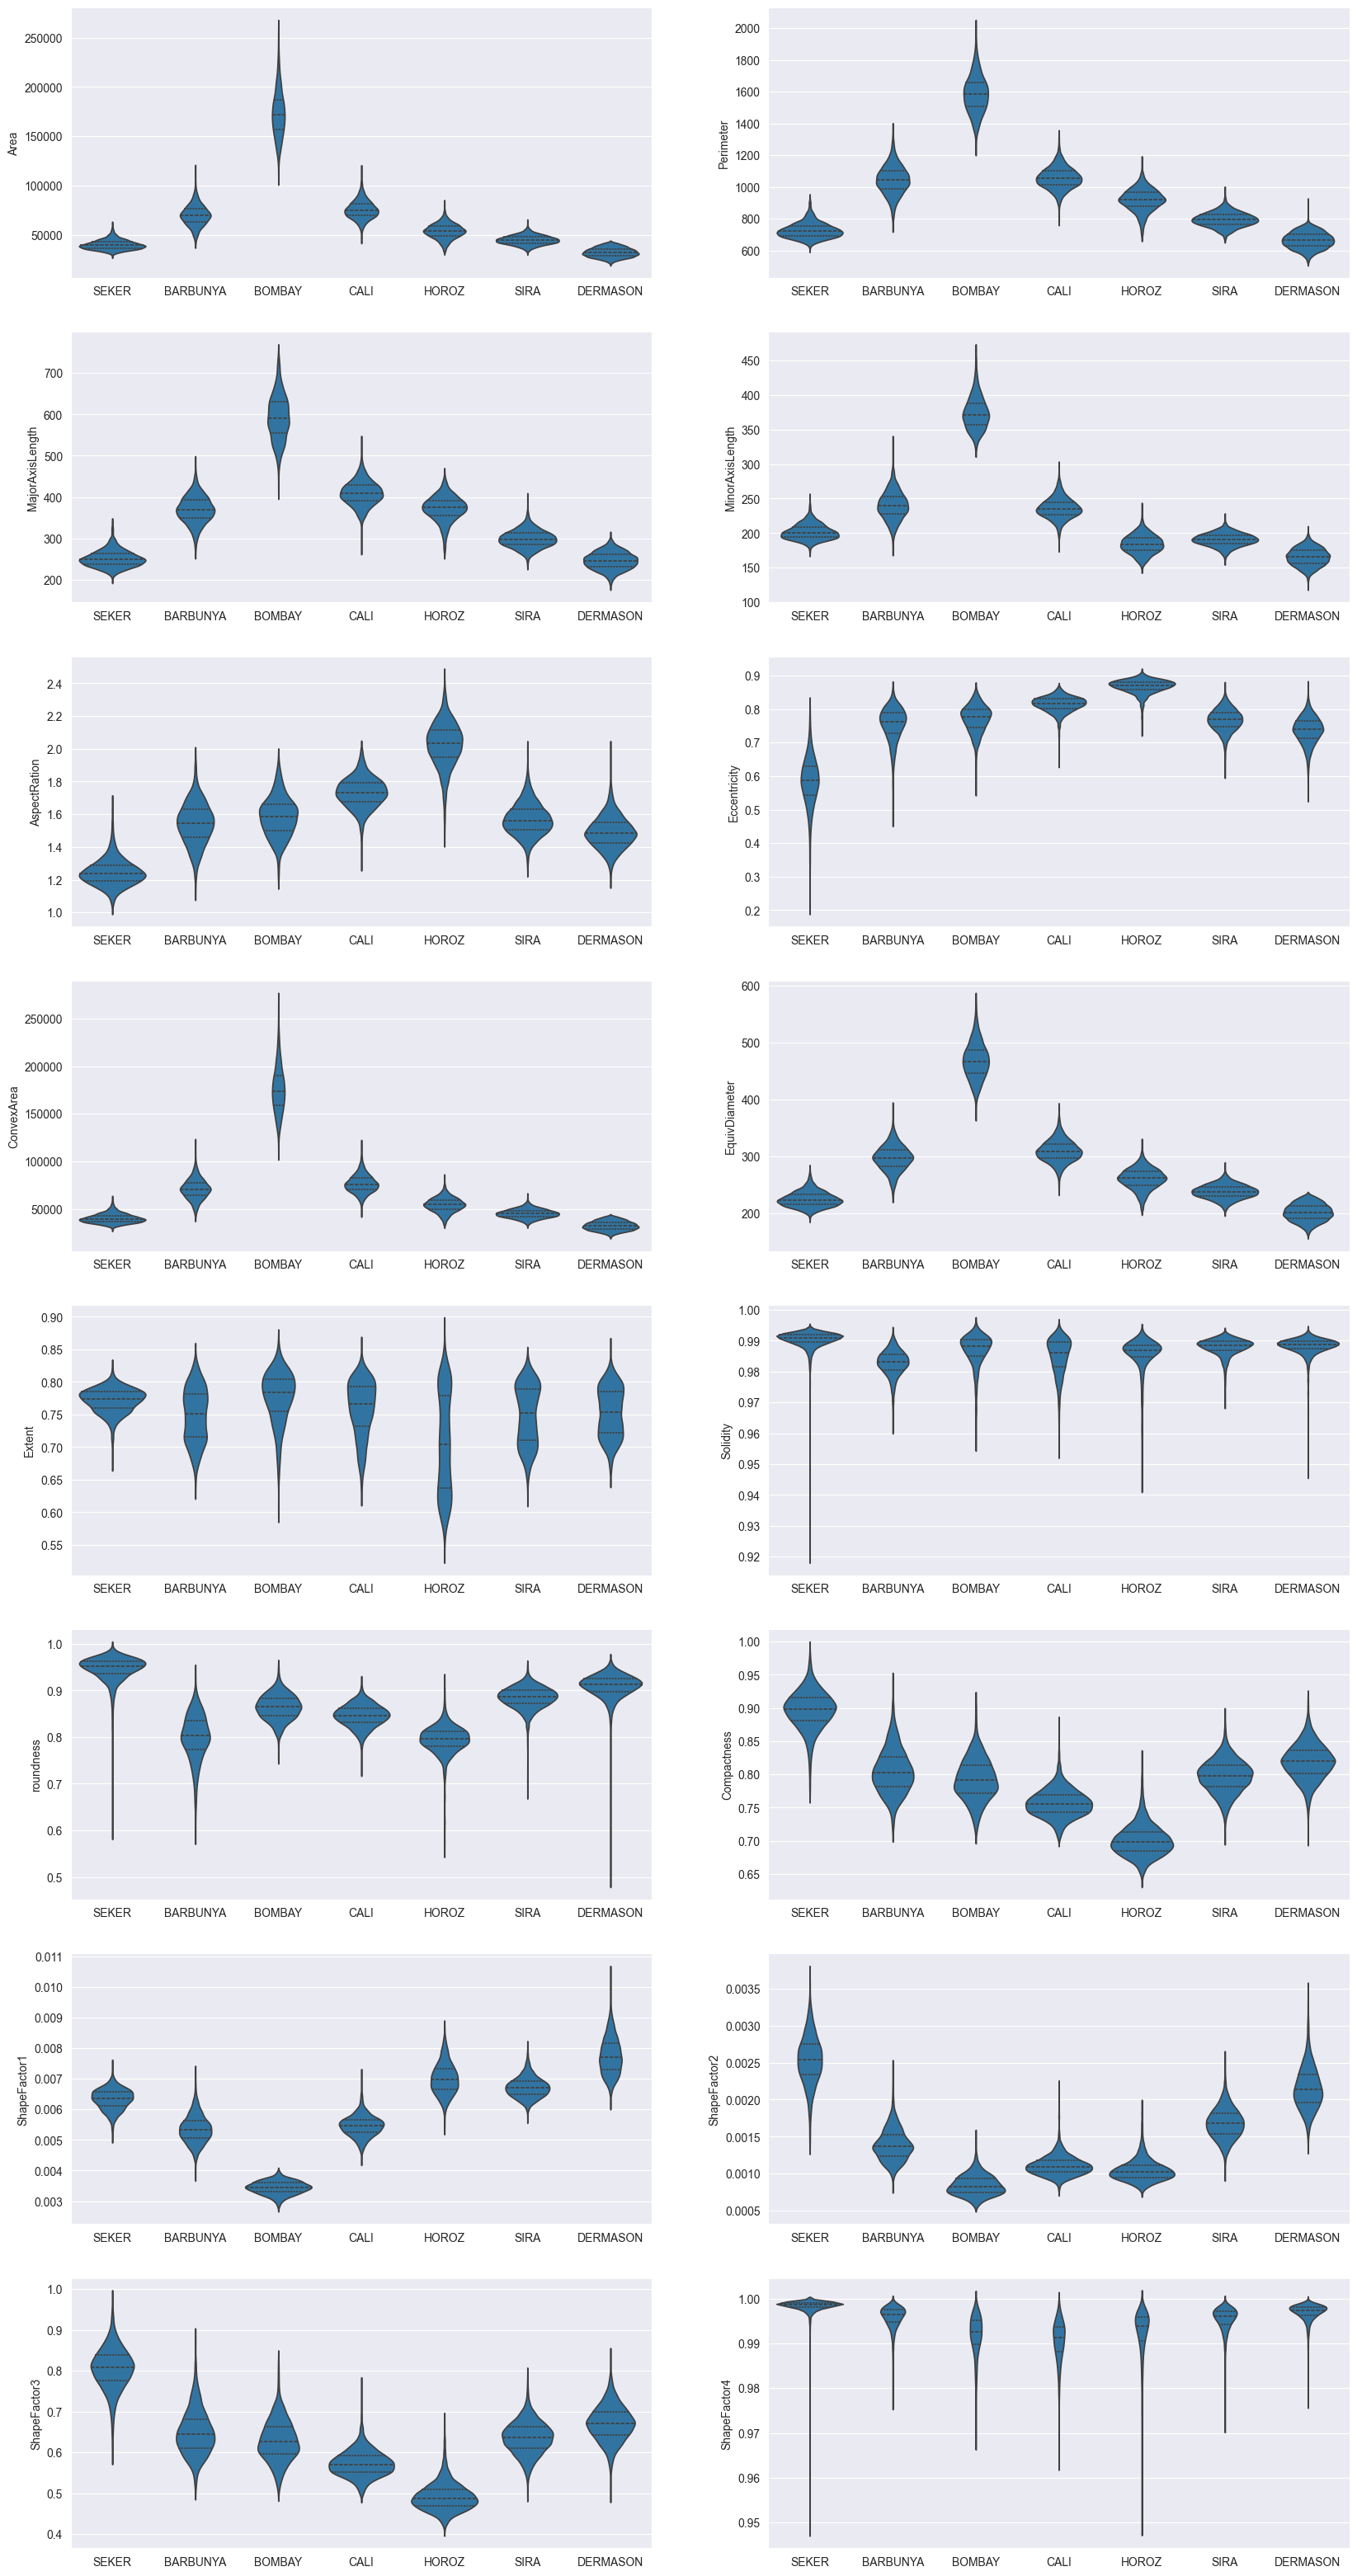

In [14]:
data = data.rename(columns={'Class': 'y'})

# Verteilung der Bean-Typen plotten
data["y"].value_counts().plot(kind='bar',
                              title= "Bean type counts in the training data",
                              xlabel= 'Bean type',
                              ylabel= 'Count')

# Violinplots für alle Features
fig, axes = plt.subplots(8, 2, figsize = (20, 40))
for feature, ax in zip(data.columns.drop("y"), axes.flatten()):
    sns.violinplot(data=data,
                   x="y",
                   y=feature,
                   inner="quartile",
                   ax=ax)
    ax.set(xlabel=None)
plt.show()

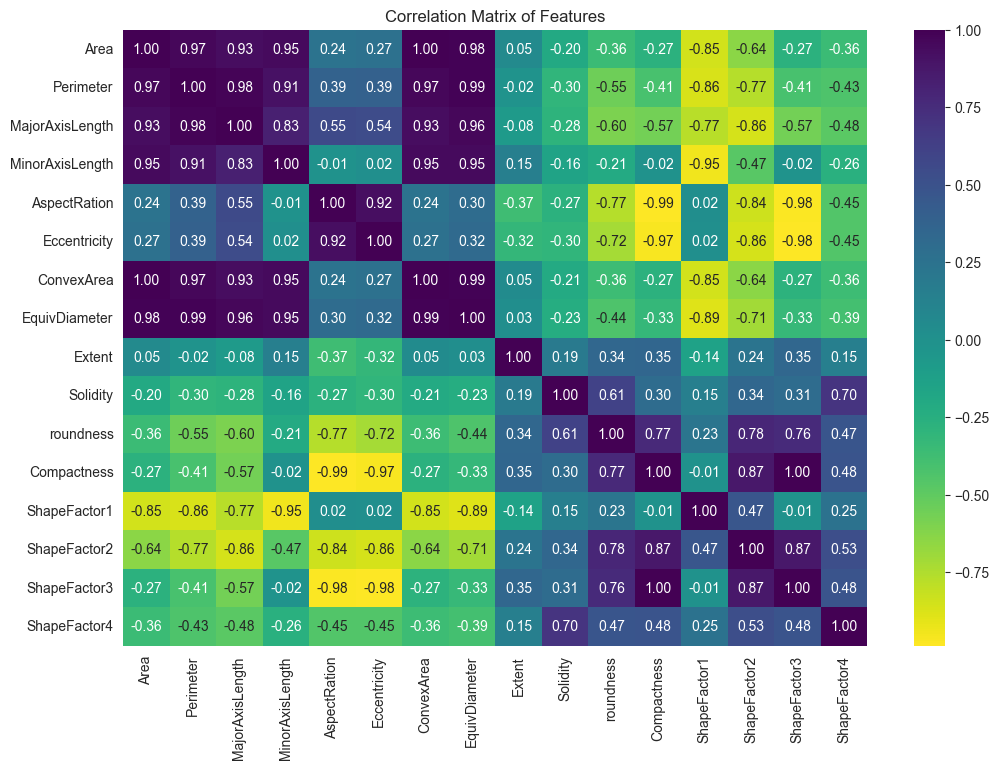

In [18]:

# Numerische Spalten auswählen
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Korrelationen berechnen
correlation_matrix = data[numeric_cols].corr()

# Heatmap erstellen
plt.figure(figsize=[12, 8])
sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

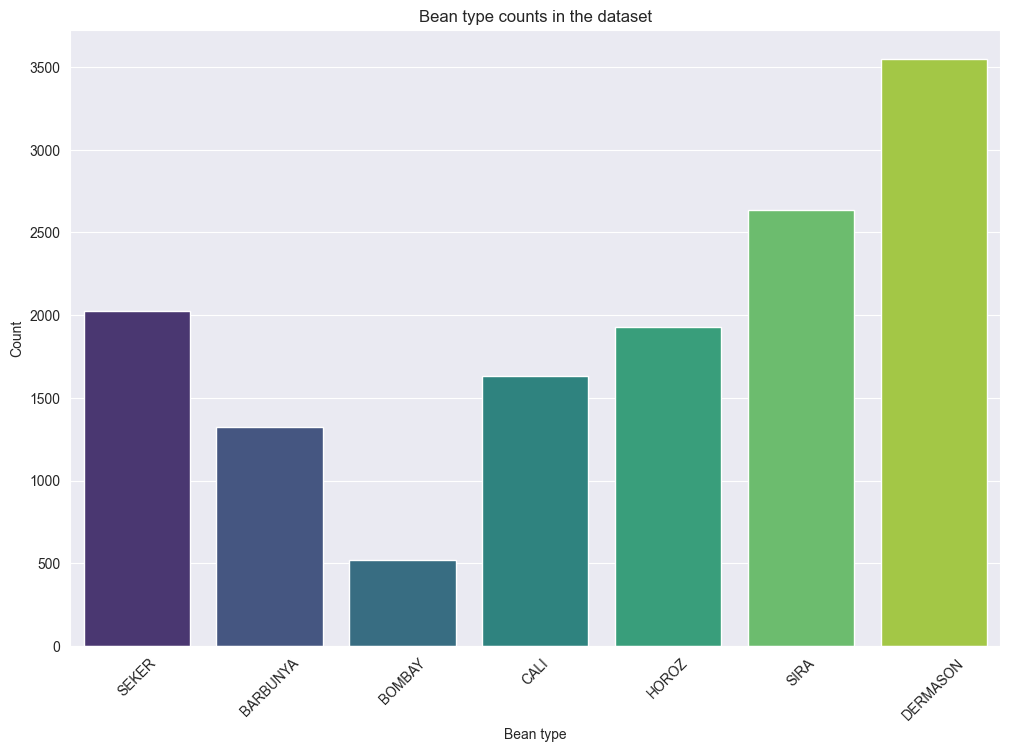

In [19]:
data = data.rename(columns={'Class': 'y'})

# Verteilung der Bohnenklassen plotten
plt.figure(figsize=(12, 8))
sns.countplot(x='y', data=data, palette='viridis')
plt.title('Bean type counts in the dataset')
plt.xlabel('Bean type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()